# Notebook for viewing predictions/segmentations.  To view segmentations, first save segmentations by running evaluateFile.py with saveSegs=True

In [80]:
# %matplotlib inline
import os
import matplotlib.cm as cm
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import h5py
import array
from browse_components import display_preds,display_seg,trim#from browse_components import display_preds
   
## Just to access the images...
data_folder = 'nobackup/turaga/data/fibsem_medulla_7col/tstvol-520-2-h5/'
os.chdir('/.')

#Open training data
f = h5py.File(data_folder + 'img_normalized.h5', 'r')
im = f['main']

#Open training labels
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g['main'],dtype='float32') #3,z,y,x
label_set = np.transpose(label_set,(1,2,3,0))

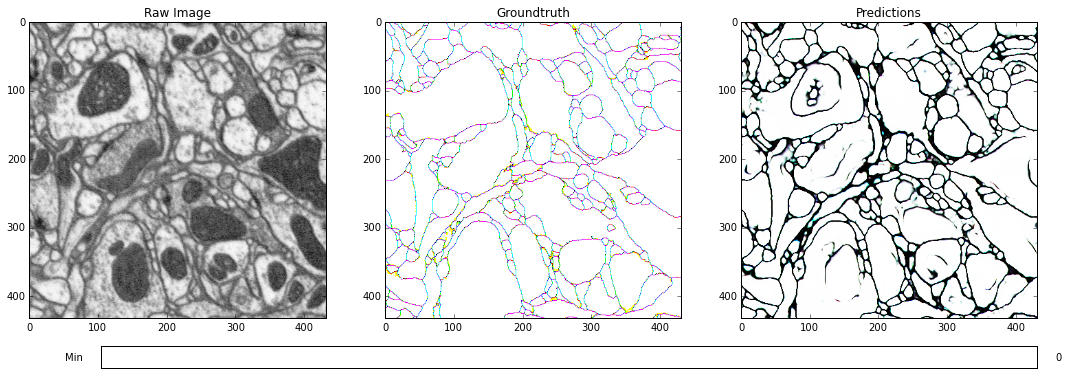

In [81]:
# preds
train_or_test='test' # if changed, also reload im,labels 
iteration = 50000
folder = '2' # 2 for fibsem 2, ave for average, ...
hdf5_pred_file = '/tier2/turaga/singhc/'+train_or_test+'/output_'+str(iteration)+'/tstvol-2_'+folder+'.h5'
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
aff = np.asarray(hdf5_aff['main'],dtype='float32')

# transpose so they match image
aff = np.transpose(aff,(1,2,3,0))

im,label_set=trim(im,label_set,aff)

display_preds(im, label_set, aff, im_size=432, im2_size=432)

## Code for viewing segmentations (currently gt - have to save them first)

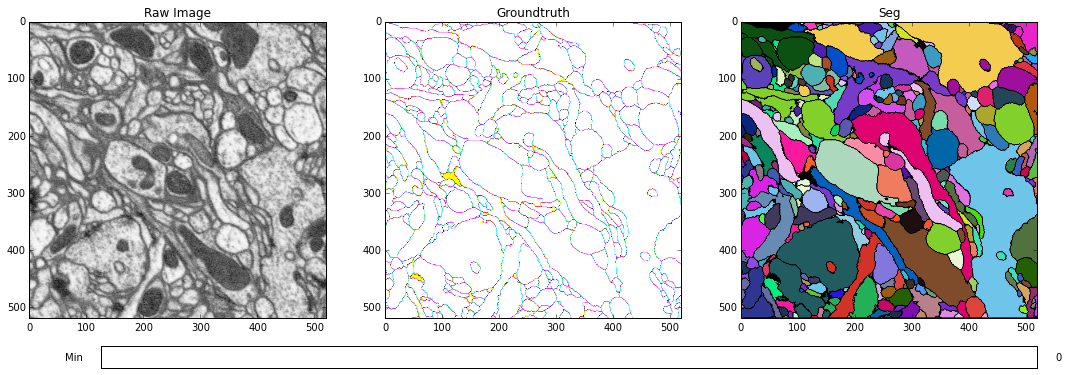

In [74]:
hdf5_seg_file = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-2-h5/groundtruth_seg_thick.h5'
#hdf5_seg_file = '/tier2/turaga/singhc/out/test_save_dat/square/1000.dat'
hdf5_seg = h5py.File(hdf5_seg_file, 'r')
seg = np.asarray(hdf5_seg['main'],dtype='uint32')

data_set,label_set=trim(im,label_set,seg)

display_seg(im, label_set, seg, im_size=520, im2_size=520)